機械学習の各種アルゴリズムは特に「ブラックボックス」と見なされ、性能が良い一方で予測の根拠がわかりづらいとも言われます。
そういった課題に対して様々な手法が提案されています。

今回は、特徴量のうち各要素がどの程度予測に寄与したかを算出する手法を紹介します。

### データの前処理

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


機械学習のアルゴリズムが使えるように、必要最低限の前処理の実行をしていきます。
具体的には文字列形式のデータを数値に置き換えましょう。

In [3]:
encode_cols = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

for f in encode_cols:
  lbl = LabelEncoder()
  df[f] = lbl.fit_transform(list(df[f].values))

数値系データの欠損値も処理しておきます。
今回は単純に平均値で補完します。

In [4]:
encode_cols = ["age", "fare"]

for f in encode_cols:
  df[f].fillna(df[f].mean(), inplace=True)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


今回は生存を予測するモデルを作るので、survived のカラムを目的変数 y として切り出します。
survived と alive は全く同じ内容なので片方のみを使います。
合わせて、データセットを学習用とテスト用に分割しておきます。

In [6]:
X = df.drop(["survived", "alive"], axis=1)
y = df["survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

### ランダムフォレストの学習・予測

機械学習のアルゴリズムの一つ「ランダムフォレスト」を用いた学習・予測を実行しましょう。

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [9]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0])

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, y_pred)

0.8

### 特徴量の重要度の表示・活用

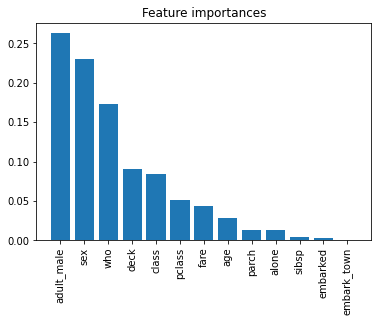

In [17]:
import numpy as np
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indicies = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indicies], align="center")
plt.xticks(range(X.shape[1]), X.columns[indicies], rotation="vertical")
plt.xlim([-1, X.shape[1]])
plt.show()

この特徴量の重要度は、それぞれのカラムがどの程度予測に寄与しているかを示します。今回の場合は adult_male, sex が上位にきており、タイタニック号の生存予測というタスクにおいて年齢や性別が重要であることが読み取れます。

最後に応用例として、新しい特徴量を追加した場合も考えてみましょう。
兄弟、配偶者の数を示す sibsp と両親、子供の数を示す parch を足して、新たに家族全体の人数を示す family_size を追加してみます。

In [18]:
df["family_size"] = df["sibsp"] + df["parch"] + 1 # 最後の1は自分自身

改めてデータを分割の上、ランダムフォレストの学習・予測を実行します。テストデータでの正答率を確認したところ、追加前よりも高い値が出ました。

In [19]:
X = df.drop(["survived", "alive"], axis=1)
y = df["survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8067796610169492

改めて特徴量の重要度を確認してみましょう。追加したfamily_sizeが一定の重要度を持っていることが分かります。

一方で重要度の小さい embark_town は、特徴量から削除しても良いかもしれません。特徴量の重要度は、予測に利用する特徴量の選択にも活用できます。

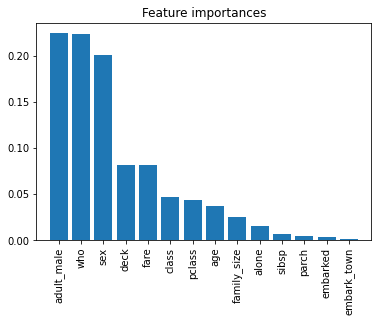

In [20]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()